# K-Means Clustering

## Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')
display(dataset.head(10))

# Define independent variables X
# X = Annual Income (k$) and Spending Score (1-100)

X_df = dataset.iloc[:, 3:5] # every rows, every numerical columns except last
display(X_df.head(10))

X = dataset.iloc[:, [3, 4]].values

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## Elbow Method to find optimal number of clusters

help data scientists select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

sum of distances of observations from cluster centroids, called Within-Cluster-Sum-of-Squares (WCSS)

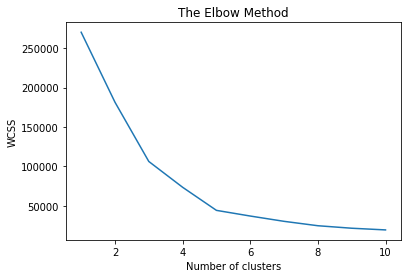

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

--> n_clusters = 5

## Applying k-means to dataset

In [8]:
# n_clusters: The number of clusters to form as well as the number of centroids to generate.

# init: Method for initialization: 
# ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

# max_iter: Maximum number of iterations of the k-means algorithm for a single run.

# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.


kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

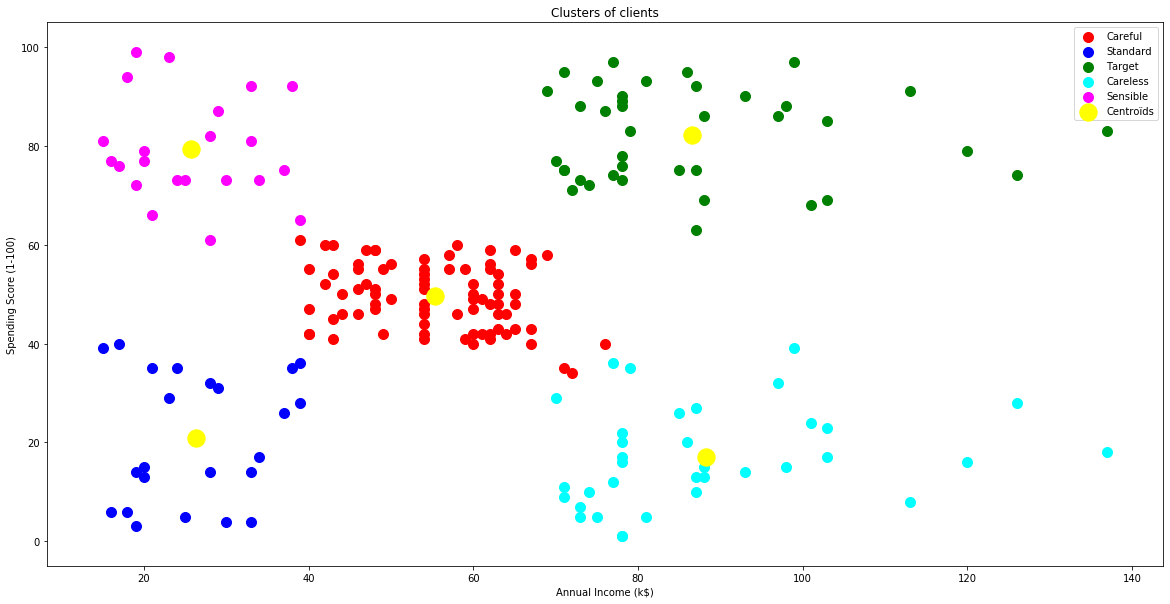

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroïds')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.